# Figure6. Correlation between DNA and RNA sequence features.

1. Since the DNA sequence feature changes little when using different length, the sequence length is aligned to the best sequence length in RNA(141bp)

In [52]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def concatenate_features(dna_path, rna_path):
    """
    Desc:
        concatenate DNA and RNA features
    Args:
        dna_path, the dna feature path
        rna_path, the rna feature path
    Returns:
        combined_df, the concatenated dataframe
    """
    # Load data
    DNA_df = pd.read_csv(dna_path)
    RNA_df = pd.read_csv(rna_path)

    dna_name = DNA_df.columns.tolist()
    rna_name = RNA_df.columns.tolist()
    rna_name = [ele.replace(" (RNA)", "") for ele in rna_name]
    RNA_df.columns = rna_name

    # Check identify feature name
    common_columns = DNA_df.columns.intersection(RNA_df.columns)
    print(f"Common columns: {common_columns}")

    # Remain common feature
    DNA_df = DNA_df[common_columns]
    RNA_df = RNA_df[common_columns]

    #Rearrange
    RNA_df = RNA_df.reindex(columns=dna_name)
    rna_name = RNA_df.columns.tolist()

    dna_name = ["DNA_" + ele for ele in dna_name]
    DNA_df.columns = dna_name
    rna_name = ["RNA_" + ele1 for ele1 in rna_name]
    RNA_df.columns = rna_name

    # Concatenate
    combined_df = pd.concat([DNA_df, RNA_df], axis=1)
    return combined_df


def draw_heatmap(combined_df, title_name, save_path):
    """
    Desc:
        draw heatmap
    Args:
        title_name, the title name of this graph
        save_path, the save path of this graph
    """
    corr_matrix = combined_df.corr()

    dna_columns = [col for col in combined_df.columns if col.startswith("DNA_")]
    rna_columns = [col for col in combined_df.columns if col.startswith("RNA_")]

    cross_corr = corr_matrix.loc[dna_columns, rna_columns]

    mask = np.zeros_like(cross_corr, dtype=bool)
    mask[np.diag_indices_from(mask)] = True

    plt.figure(figsize=(12, 11))
    font_size = 17
    font = {'family': 'DejaVu Sans', 'size': font_size}
    matplotlib.rc('font', **font)

    matplotlib.rcParams['figure.subplot.left'] = 0.2
    matplotlib.rcParams['figure.subplot.right'] = 0.95
    matplotlib.rcParams['figure.subplot.top'] = 0.95
    matplotlib.rcParams['figure.subplot.bottom'] = 0.2
    sns.heatmap(cross_corr, mask=~mask, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})

    ax = plt.gca()
    xticks = ax.get_xticks()
    yticks = ax.get_yticks()
    xtick_labels = [cross_corr.columns[int(i)].replace("RNA_", "") for i in xticks if int(i) < len(cross_corr.columns)]
    ytick_labels = [cross_corr.index[int(i)].replace("DNA_", "") for i in yticks if int(i) < len(cross_corr.index)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=50,  ha='right')
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels, rotation=0)
    plt.tight_layout()

    plt.title(f"Feature ({title_name}) correlation across DNA and RNA", fontsize=22, pad=30, fontweight='bold')
    plt.xlabel("RNA", fontsize=22, fontweight='bold')
    plt.ylabel("DNA", fontsize=22, fontweight='bold')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()


## Figure 6A. NAC and Z-curve

Common columns: Index(['NAC_A', 'NAC_C', 'NAC_G', 'NAC_T', 'Zcurve9_1.x', 'Zcurve9_1.y',
       'Zcurve9_1.z', 'Zcurve9_2.x', 'Zcurve9_2.y', 'Zcurve9_2.z',
       'Zcurve9_3.x', 'Zcurve9_3.y', 'Zcurve9_3.z', 'Zcurve12_A.x',
       'Zcurve12_A.y', 'Zcurve12_A.z', 'Zcurve12_C.x', 'Zcurve12_C.y',
       'Zcurve12_C.z', 'Zcurve12_G.x', 'Zcurve12_G.y', 'Zcurve12_G.z',
       'Zcurve12_T.x', 'Zcurve12_T.y', 'Zcurve12_T.z'],
      dtype='object')


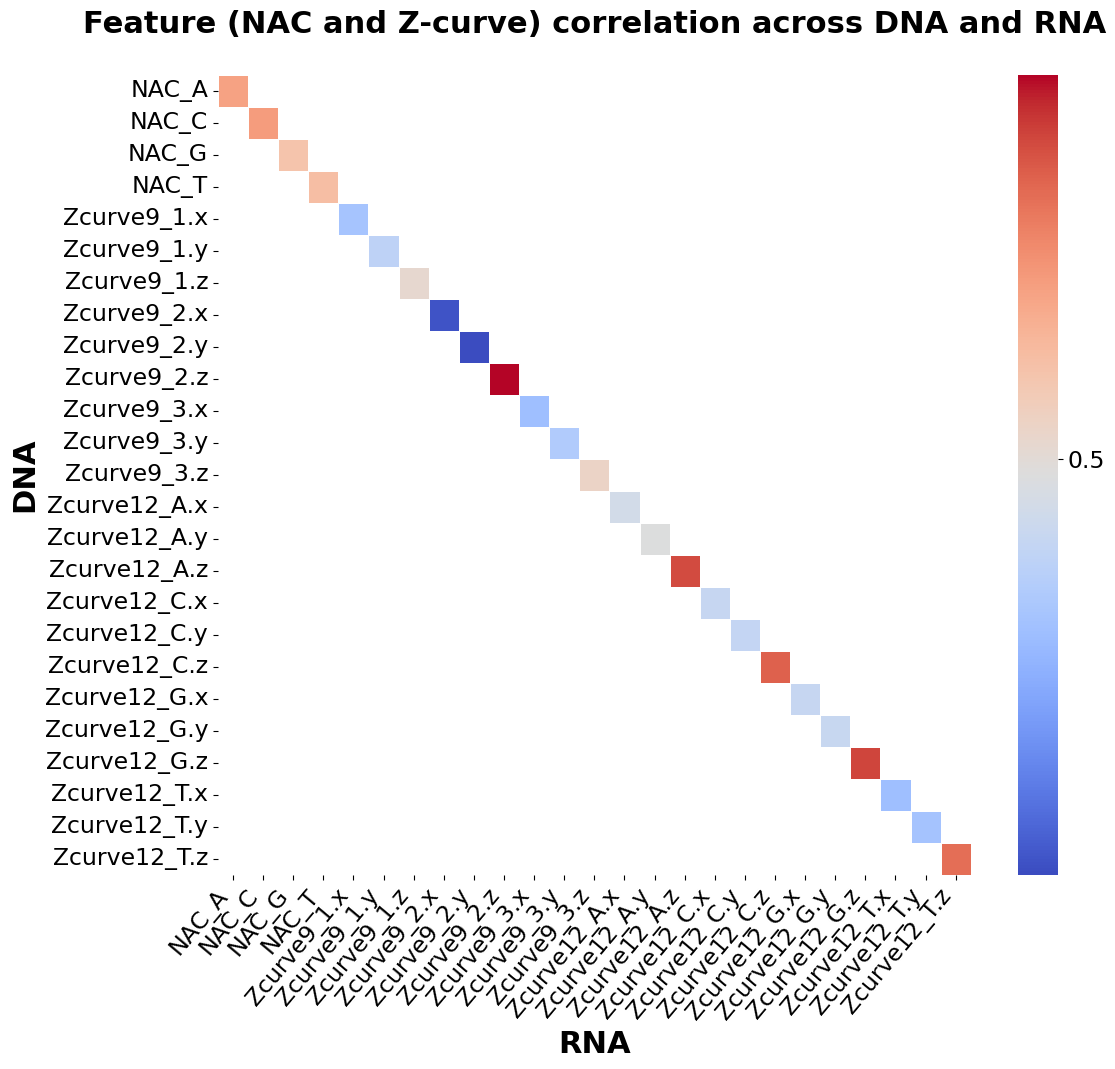

In [ ]:
DNA_file = "../data/train8502_DNA_171alt_iFeatueOmega_fea1.csv"
RNA_file = "../data/train8502_RNA_171alt_iFeatureOmega_fea1.csv"
combined_df = concatenate_features(DNA_file, RNA_file)
draw_heatmap(combined_df, "NAC and Z-curve", "./Figure6A.png")

## Figure 6B. ASDC and NMBroto

Common columns: Index(['ASDC_AA', 'ASDC_AC', 'ASDC_AG', 'ASDC_AT', 'ASDC_CA', 'ASDC_CC',
       'ASDC_CG', 'ASDC_CT', 'ASDC_GA', 'ASDC_GC', 'ASDC_GG', 'ASDC_GT',
       'ASDC_TA', 'ASDC_TC', 'ASDC_TG', 'ASDC_TT', 'NMBroto_Twist.lag1',
       'NMBroto_Twist.lag2', 'NMBroto_Twist.lag3', 'NMBroto_Tilt.lag1',
       'NMBroto_Tilt.lag2', 'NMBroto_Tilt.lag3', 'NMBroto_Roll.lag1',
       'NMBroto_Roll.lag2', 'NMBroto_Roll.lag3', 'NMBroto_Shift.lag1',
       'NMBroto_Shift.lag2', 'NMBroto_Shift.lag3', 'NMBroto_Slide.lag1',
       'NMBroto_Slide.lag2', 'NMBroto_Slide.lag3', 'NMBroto_Rise.lag1',
       'NMBroto_Rise.lag2', 'NMBroto_Rise.lag3'],
      dtype='object')


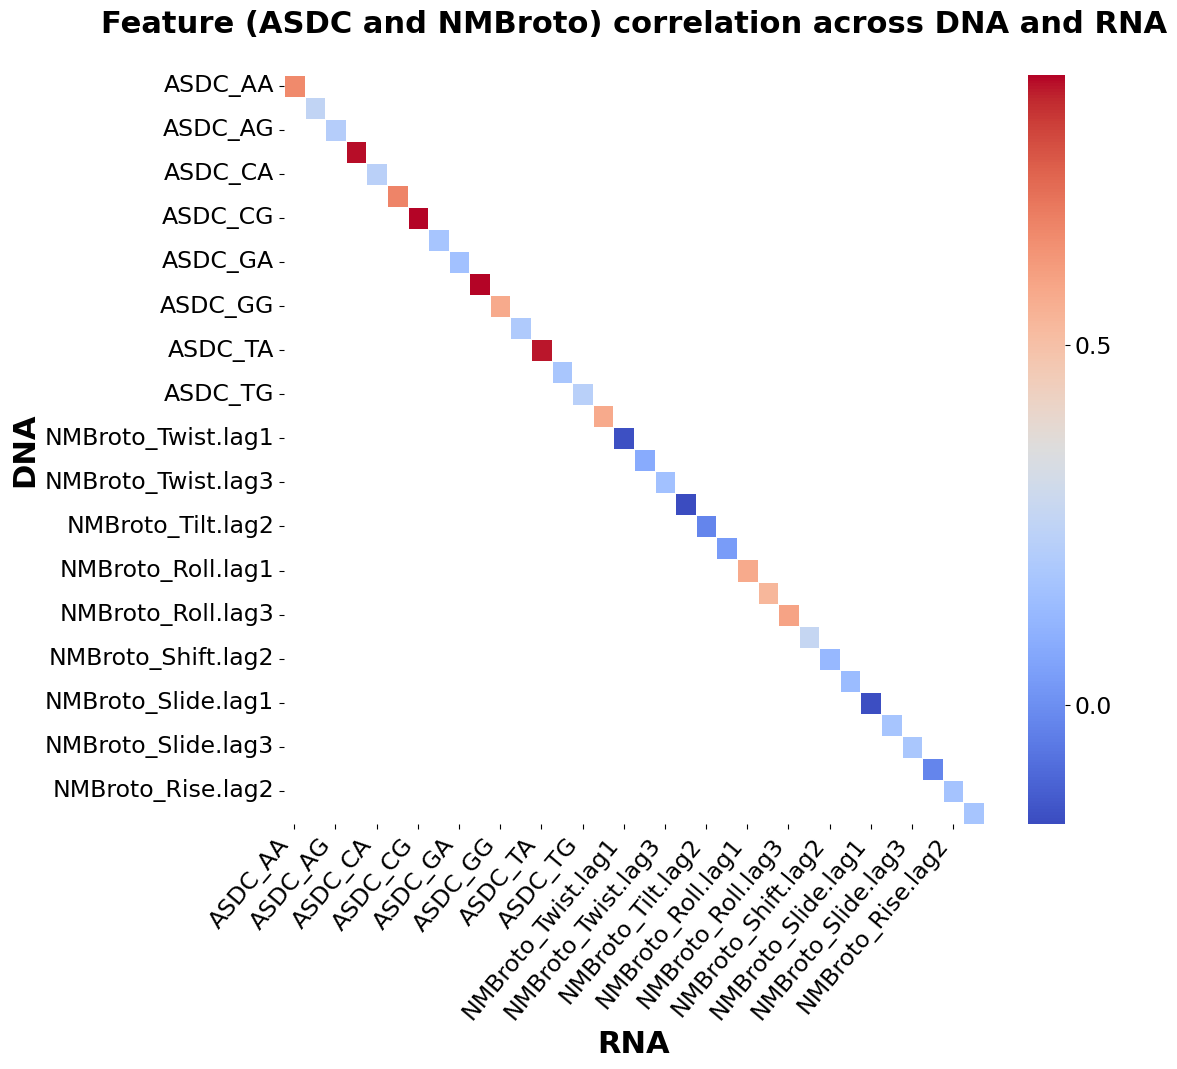

In [ ]:
DNA_file = "../data/train8502_DNA_171alt_iFeatueOmega_fea2.csv"
RNA_file = "../data/train8502_RNA_171alt_iFeatureOmega_fea2.csv"
combined_df = concatenate_features(DNA_file, RNA_file)
draw_heatmap(combined_df, "ASDC and NMBroto", "./Figure6B.png")

## Figure 6C. Moran and Geary

Common columns: Index(['Moran_Twist.lag1', 'Moran_Twist.lag2', 'Moran_Twist.lag3',
       'Moran_Tilt.lag1', 'Moran_Tilt.lag2', 'Moran_Tilt.lag3',
       'Moran_Roll.lag1', 'Moran_Roll.lag2', 'Moran_Roll.lag3',
       'Moran_Shift.lag1', 'Moran_Shift.lag2', 'Moran_Shift.lag3',
       'Moran_Slide.lag1', 'Moran_Slide.lag2', 'Moran_Slide.lag3',
       'Moran_Rise.lag1', 'Moran_Rise.lag2', 'Moran_Rise.lag3',
       'Geary_Twist.lag1', 'Geary_Twist.lag2', 'Geary_Twist.lag3',
       'Geary_Tilt.lag1', 'Geary_Tilt.lag2', 'Geary_Tilt.lag3',
       'Geary_Roll.lag1', 'Geary_Roll.lag2', 'Geary_Roll.lag3',
       'Geary_Shift.lag1', 'Geary_Shift.lag2', 'Geary_Shift.lag3',
       'Geary_Slide.lag1', 'Geary_Slide.lag2', 'Geary_Slide.lag3',
       'Geary_Rise.lag1', 'Geary_Rise.lag2', 'Geary_Rise.lag3'],
      dtype='object')


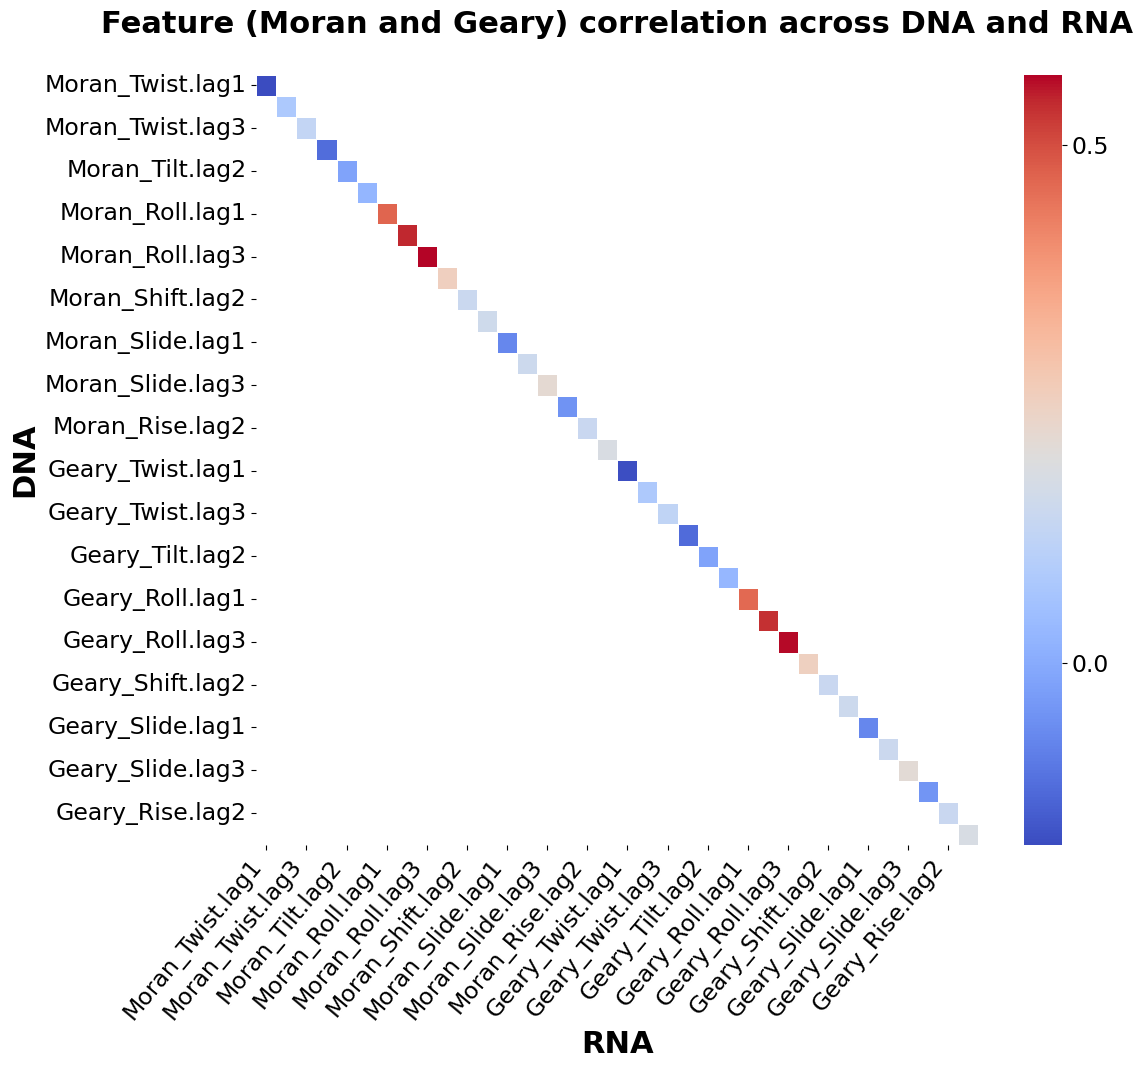

In [ ]:
DNA_file = "../data/train8502_DNA_171alt_iFeatueOmega_fea3.csv"
RNA_file = "../data/train8502_RNA_171alt_iFeatureOmega_fea3.csv"
combined_df = concatenate_features(DNA_file, RNA_file)
draw_heatmap(combined_df, "Moran and Geary", "./Figure6C.png")

## Figure 6D. DAC DCC DACC 

Common columns: Index(['DAC_Twist.lag1', 'DAC_Twist.lag2', 'DAC_Twist.lag3', 'DAC_Tilt.lag1',
       'DAC_Tilt.lag2', 'DAC_Tilt.lag3', 'DAC_Roll.lag1', 'DAC_Roll.lag2',
       'DAC_Roll.lag3', 'DAC_Shift.lag1', 'DAC_Shift.lag2', 'DAC_Shift.lag3',
       'DAC_Slide.lag1', 'DAC_Slide.lag2', 'DAC_Slide.lag3', 'DAC_Rise.lag1',
       'DAC_Rise.lag2', 'DAC_Rise.lag3', 'DCC_Twist.lag1', 'DCC_Twist.lag2',
       'DCC_Twist.lag3', 'DCC_Tilt.lag1', 'DCC_Tilt.lag2', 'DCC_Tilt.lag3',
       'DCC_Roll.lag1', 'DCC_Roll.lag2', 'DCC_Roll.lag3', 'DCC_Shift.lag1',
       'DCC_Shift.lag2', 'DCC_Shift.lag3', 'DCC_Slide.lag1', 'DCC_Slide.lag2',
       'DCC_Slide.lag3', 'DCC_Rise.lag1', 'DCC_Rise.lag2', 'DCC_Rise.lag3',
       'DACC_Twist.lag1', 'DACC_Twist.lag2', 'DACC_Twist.lag3',
       'DACC_Tilt.lag1', 'DACC_Tilt.lag2', 'DACC_Tilt.lag3', 'DACC_Roll.lag1',
       'DACC_Roll.lag2', 'DACC_Roll.lag3', 'DACC_Shift.lag1',
       'DACC_Shift.lag2', 'DACC_Shift.lag3', 'DACC_Slide.lag1',
       'DACC_Slide.lag

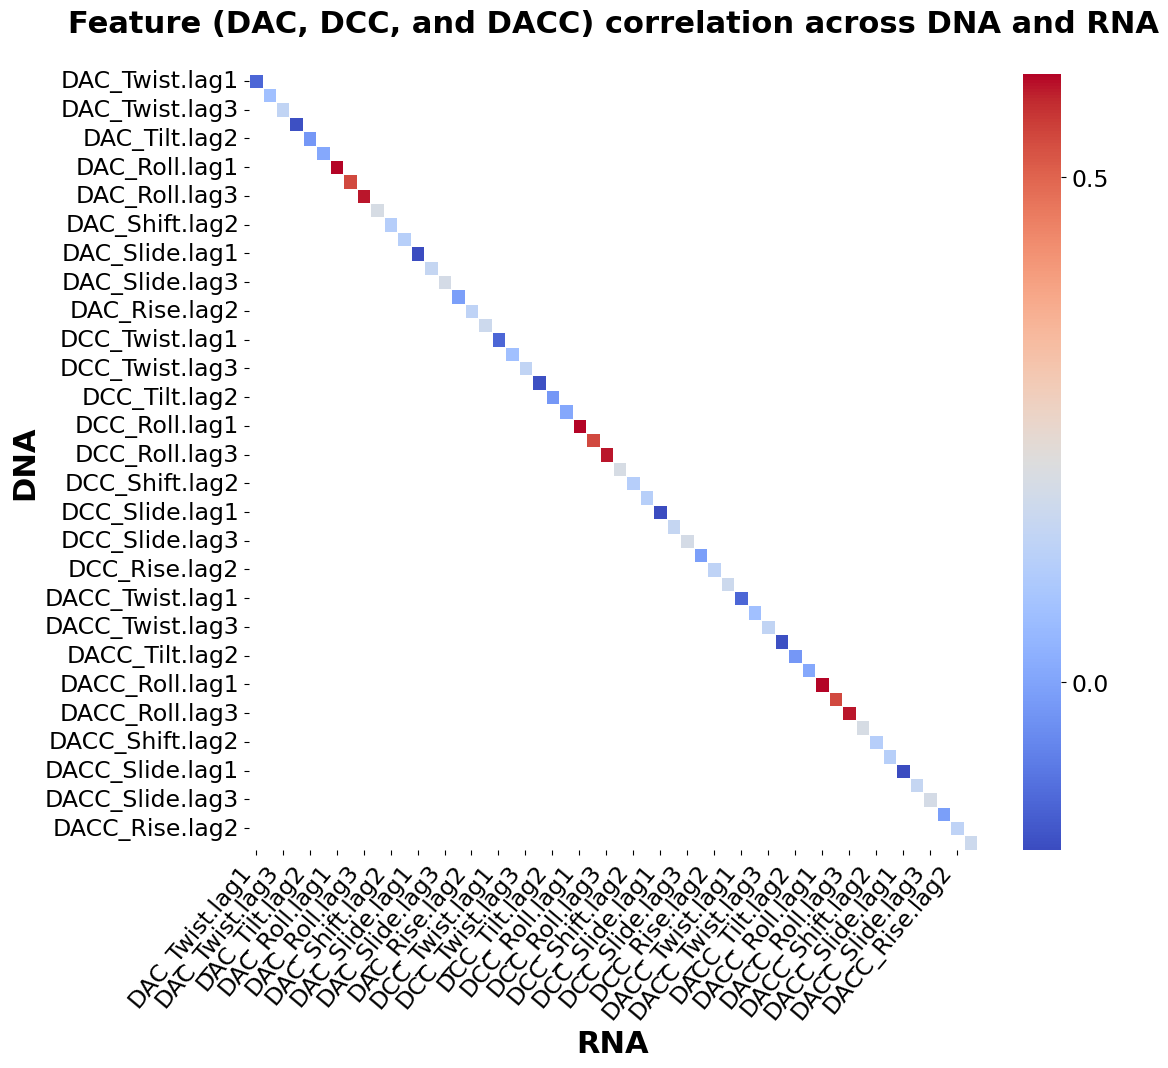

In [ ]:
DNA_file = "../data/train8502_DNA_171alt_iFeatueOmega_fea4.csv"
RNA_file = "../data/train8502_RNA_171alt_iFeatureOmega_fea4.csv"
combined_df = concatenate_features(DNA_file, RNA_file)
draw_heatmap(combined_df, "DAC, DCC, and DACC", "./Figure6D.png")